In [1]:
from coreLib.dataset import DataSet
from coreLib.utils import create_dir,LOG_INFO
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/"
save_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/"
ds=DataSet(data_dir)

# data
nb_train  =  25000
nb_test   =  5000


# create dirs
save_dir   =  create_dir(save_dir,"banglaDetHor")
train_dir  =  create_dir(save_dir,"train")
test_dir   =  create_dir(save_dir,"test")

# train
train_image_dir  =  create_dir(train_dir,"images")
train_char_dir   =  create_dir(train_dir,"char_level")
train_word_dir   =  create_dir(train_dir,"word_level")
train_poly_dir   =  create_dir(train_dir,"annotations")



# test
test_image_dir  =  create_dir(test_dir,"images")
test_char_dir   =  create_dir(test_dir,"char_level")
test_word_dir   =  create_dir(test_dir,"word_level")
test_poly_dir   =  create_dir(test_dir,"annotations")

#LOG     :All paths found


  0%|          | 1376/1059977 [00:00<01:29, 11781.80it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 563825.55it/s]


#LOG     :converting int labels to string


  1%|          | 3464/370098 [00:00<00:10, 34635.08it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 217156.68it/s]


#LOG     :bangla.graphemes


100%|██████████| 200840/200840 [00:00<00:00, 1448704.53it/s]


#LOG     :bangla.numbers


100%|██████████| 46101/46101 [00:00<00:00, 3352142.03it/s]


#LOG     :english.graphemes
#LOG     :english.numbers


100%|██████████| 982/982 [00:00<00:00, 2373951.89it/s]


#LOG     :common.symbols
#LOG     :bangla.fonts
#LOG     :english.fonts
#LOG     :common.background
#LOG     :common.noise.random


100%|██████████| 3240/3240 [00:00<00:00, 2531112.86it/s]


#LOG     :common.noise.sign


In [2]:
class train:
    image=train_image_dir
    char =train_char_dir
    word =train_word_dir
    poly =train_poly_dir

class test:
    image=test_image_dir
    char =test_char_dir
    word =test_word_dir
    poly =test_poly_dir

In [3]:
from coreLib.render import createSceneImage,backgroundGenerator,createImageData
from coreLib.config import config
from coreLib.format import convertToTotalText
backGen=backgroundGenerator(ds,dim=(config.back_dim,config.back_dim))
back=next(backGen)

100%|██████████| 982/982 [00:00<00:00, 1567874.58it/s]


In [4]:
import os
import cv2
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
def saveData(nb,mode):
    '''
        number of images to save
    '''
    for i in tqdm(range(nb)):
        try:
            # data execution
            page,labels=createSceneImage(ds)
            back=createImageData(backGen,page,labels)
            charmap,wordmap,lines=convertToTotalText(page,labels)
            plt.imshow(wordmap)
            plt.show()
            # data formation
            img_path =os.path.join(mode.image,f"img{i}.png")
            char_path=os.path.join(mode.char,f"img{i}.png")
            word_path=os.path.join(mode.word,f"img{i}.png")
            poly_path=os.path.join(mode.poly,f"ploy_gt_img{i}.txt")
            # save
            cv2.imwrite(img_path,back)
            cv2.imwrite(char_path,charmap)
            cv2.imwrite(word_path,wordmap)
            with open(poly_path,"w") as pt:
                for line in lines:
                    pt.write(f"{line}\n")
        except Exception as e:
            pass
        
            

  0%|          | 0/1 [00:00<?, ?it/s]

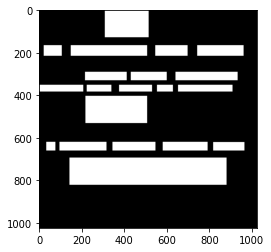

In [5]:
 #saveData(nb_train,train)
 saveData(1,test)
    